In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import matplotlib.image as mpimg
import skimage
from skimage import measure
import pandas as pd 
from PIL import Image

(2296, 1021)


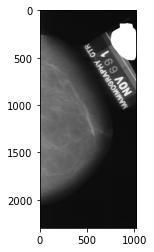

In [2]:
# Read an image
img = cv2.imread("../input/miniddsm2/Normal/0250/A_0250_1.RIGHT_CC.png",0)

# Check it's shape
print(img.shape)

# show the image
plt.imshow(img, cmap="gray")

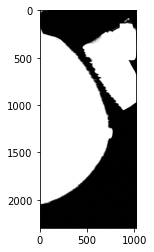

In [3]:
_,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

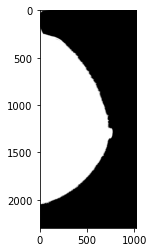

In [4]:
# Function to extract the largest white object 
# in the thershold image and make it as the mask

labels_mask = measure.label(thresh1)               
regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)
if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
labels_mask[labels_mask!=0] = 1
mask = labels_mask

# convert dtyoe to uint8
mask = mask.astype(np.uint8)

plt.imshow(mask, cmap="gray")

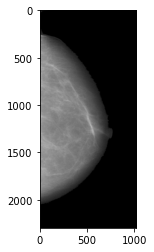

In [5]:
# then merge this mask with the original image

breast_only = cv2.bitwise_and(img, img , mask=mask)
plt.imshow(breast_only, cmap="gray")

In [6]:
breast_only.shape

(2296, 1021)

In [7]:
# All-together


def image_preprocessing(file_path):
    img = cv2.imread(file_path, 0)
    
    ret,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)

    labels_mask = measure.label(thresh1)                       
    regions = measure.regionprops(labels_mask)
    regions.sort(key=lambda x: x.area, reverse=True)
    if len(regions) > 1:
        for rg in regions[1:]:
            labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
    labels_mask[labels_mask!=0] = 1
    mask = labels_mask
    mask = mask.astype(np.uint8)
    breast_only = cv2.bitwise_and(img, img , mask=mask)
    
    # Clahe
    #clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
    #cl1 = clahe.apply(breast_only)
          
    return breast_only


In [8]:

img_list = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".png") and "Mask" not in filename:
            img_list.append(os.path.join(dirname, filename))

with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_path", "label"])
    for img_name in img_list:
        if "Benign" in img_name:
            writer.writerow([img_name, "Benign"])
        if "Cancer" in img_name:
            writer.writerow([img_name, "Cancer"])
        if "Normal" in img_name:
            writer.writerow([img_name, "Normal"])

In [9]:
df = pd.read_csv("data.csv")
df

,image_path,label
0,/kaggle/input/miniddsm2/Cancer/1520/A_1520_1.L...,Cancer
1,/kaggle/input/miniddsm2/Cancer/1520/A_1520_1.L...,Cancer
2,/kaggle/input/miniddsm2/Cancer/1520/A_1520_1.R...,Cancer
3,/kaggle/input/miniddsm2/Cancer/1520/A_1520_1.R...,Cancer
4,/kaggle/input/miniddsm2/Cancer/1520/Copy/A_152...,Cancer
...,...,...
7807,/kaggle/input/miniddsm2/Normal/0299/A_0299_1.R...,Normal
7808,/kaggle/input/miniddsm2/Normal/0357/A_0357_1.L...,Normal
7809,/kaggle/input/miniddsm2/Normal/0357/A_0357_1.L...,Normal
7810,/kaggle/input/miniddsm2/Normal/0357/A_0357_1.R...,Normal


In [10]:
images = df["image_path"]

In [11]:
out_path    =   ("./miniddsm2")
Cancer_path =   ("miniddsm2/Cancer")
Benign_path =   ("miniddsm2/Benign")
Normal_path =   ("miniddsm2/Normal")

if not os.path.exists(out_path):
    os.mkdir(out_path)
    
if not os.path.exists(Cancer_path):
    os.mkdir(Cancer_path)
    
if not os.path.exists(Benign_path):
    os.mkdir(Benign_path)
    
if not os.path.exists(Normal_path):
    os.mkdir(Normal_path)
    

In [12]:
for i_path in images:
    processed_img = image_preprocessing(i_path) 
    #final_image   = image_resize(processed_img, height = 640)
    final_image   = Image.fromarray(processed_img)
    if "Benign" in i_path:
        final_image.save(os.path.join("./miniddsm2", "Benign", os.path.split(i_path)[1]))
            
    elif "Cancer" in i_path:
        final_image.save(os.path.join("./miniddsm2", "Cancer", os.path.split(i_path)[1]))

    elif "Normal" in i_path:
        final_image.save(os.path.join("./miniddsm2", "Normal", os.path.split(i_path)[1]))


In [13]:
import shutil
shutil.make_archive("./miniddsm2", 'zip', "./miniddsm2")

'/kaggle/working/miniddsm2.zip'

In [14]:
shutil.rmtree("./miniddsm2")